=== Binomial Distribution Analysis ===
Parameters: n = 10, p = 0.5

User-defined PMF: P(X = 3) = 0.11719
SciPy dbinom  (P(X = 3))  = 0.11719
SciPy pbinom  (P(X ≤ 3))  = 0.17188
SciPy qbinom  (P(X ≤ x) = 0.9) → x = 7.0
SciPy rbinom  (15 random samples) = [5 6 2 5 4 7 8 7 7 7 5 6 3 5 4]



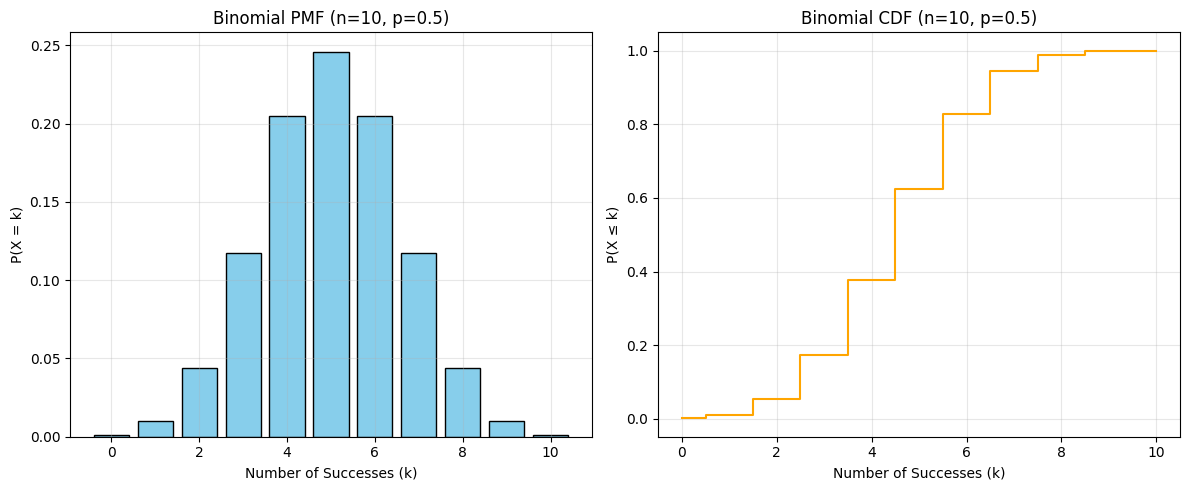

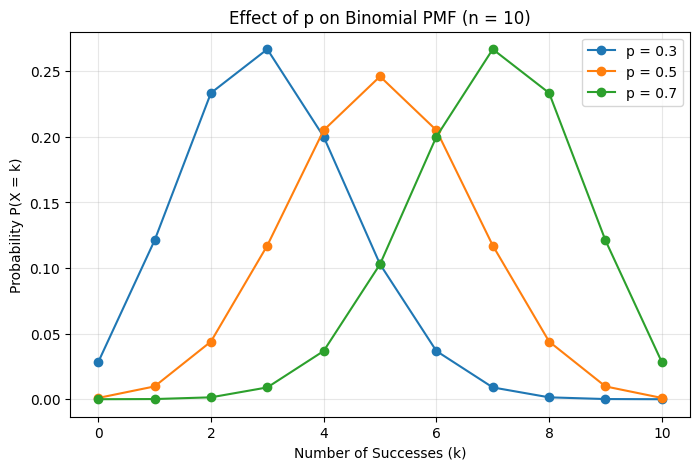

=== Discussion ===
As p increases from 0.3 to 0.7:
- The peak of the distribution shifts to the right (more successes expected).
- The distribution becomes more symmetric when p = 0.5.
- For p < 0.5 → right-skewed; for p > 0.5 → left-skewed.
This demonstrates how probability of success affects the shape and center of the Binomial Distribution.


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# -------------------------------------------------------------------
# 1. USER-DEFINED FUNCTIONS
# -------------------------------------------------------------------

def factorial(n):
    """Compute factorial of n (n!)."""
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


def nCr(n, r):
    """Compute combinations: n choose r."""
    return factorial(n) / (factorial(r) * factorial(n - r))


def binomial_pmf(n, k, p):
    """Compute Binomial PMF: P(X = k) = nCr(n, k) * p^k * (1 - p)^(n - k)."""
    return nCr(n, k) * (p ** k) * ((1 - p) ** (n - k))


# -------------------------------------------------------------------
# 2. SCIPY EQUIVALENTS (like R functions)
# -------------------------------------------------------------------

# Parameters
n = 10   # number of trials
p = 0.5  # probability of success
k = 3    # specific outcome

print("=== Binomial Distribution Analysis ===")
print(f"Parameters: n = {n}, p = {p}\n")

# Using our custom function
custom_pmf = binomial_pmf(n, k, p)
print(f"User-defined PMF: P(X = {k}) = {custom_pmf:.5f}")

# Using SciPy equivalents
pmf_val = binom.pmf(k, n, p)        # dbinom(k, n, p)
cdf_val = binom.cdf(k, n, p)        # pbinom(k, n, p)
ppf_val = binom.ppf(0.9, n, p)      # qbinom(q, n, p)
rvs_val = binom.rvs(n, p, size=15)  # rbinom(size, n, p)

print(f"SciPy dbinom  (P(X = {k}))  = {pmf_val:.5f}")
print(f"SciPy pbinom  (P(X ≤ {k}))  = {cdf_val:.5f}")
print(f"SciPy qbinom  (P(X ≤ x) = 0.9) → x = {ppf_val}")
print(f"SciPy rbinom  (15 random samples) = {rvs_val}\n")


# -------------------------------------------------------------------
# 3. PLOT THE PMF AND CDF
# -------------------------------------------------------------------

x = np.arange(0, n + 1)
pmf_values = binom.pmf(x, n, p)
cdf_values = binom.cdf(x, n, p)

plt.figure(figsize=(12, 5))

# PMF Plot
plt.subplot(1, 2, 1)
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')
plt.title(f"Binomial PMF (n={n}, p={p})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("P(X = k)")
plt.grid(alpha=0.3)

# CDF Plot
plt.subplot(1, 2, 2)
plt.step(x, cdf_values, where='mid', color='orange')
plt.title(f"Binomial CDF (n={n}, p={p})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("P(X ≤ k)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# -------------------------------------------------------------------
# 4. BONUS: EFFECT OF DIFFERENT p VALUES
# -------------------------------------------------------------------

p_values = [0.3, 0.5, 0.7]
plt.figure(figsize=(8, 5))

for p in p_values:
    plt.plot(x, binom.pmf(x, n, p), marker='o', label=f"p = {p}")

plt.title("Effect of p on Binomial PMF (n = 10)")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability P(X = k)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Discussion
print("=== Discussion ===")
print("As p increases from 0.3 to 0.7:")
print("- The peak of the distribution shifts to the right (more successes expected).")
print("- The distribution becomes more symmetric when p = 0.5.")
print("- For p < 0.5 → right-skewed; for p > 0.5 → left-skewed.")
print("This demonstrates how probability of success affects the shape and center of the Binomial Distribution.")
